In [1]:
from scipy.io import arff
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time

In [8]:
data1 = arff.loadarff(open('datasets/artificial/R15.arff','r'))
data2 = arff.loadarff(open('datasets/artificial/diamond9.arff','r'))
data3 = arff.loadarff(open('datasets/artificial/spherical_4_3.arff','r')) 

#Bad datasets
data4 = arff.loadarff(open('datasets/artificial/spiral.arff','r'))
data5 = arff.loadarff(open('datasets/artificial/complex9.arff','r')) 


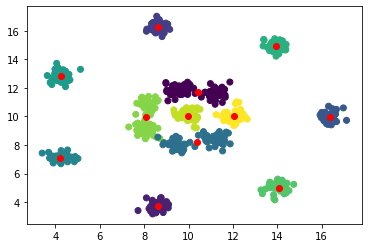

In [3]:
df = pd.DataFrame(data1[0])
#print(df)
X1, Y1 = [], []
X, Y = df['x'], df['y']

kmeans = KMeans(n_clusters = 12, random_state=0).fit(df)

plt.plot(X1, Y1)
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

            x        y class
0     660.976  304.225  b'0'
1     636.213  306.174  b'0'
2     662.753  307.565  b'0'
3     657.487  307.740  b'0'
4     635.273  308.157  b'0'
...       ...      ...   ...
3026  554.716  460.908  b'8'
3027  577.082  461.731  b'8'
3028  569.221  462.349  b'8'
3029  556.636  464.758  b'8'
3030  557.293  465.752  b'8'

[3031 rows x 3 columns]
i = 1, Y2-1 = 162342254.06075612, Y2 = 66962958.458872795
i = 2, Y2-1 = 66962958.458872795, Y2 = 48293768.664426446
i = 3, Y2-1 = 48293768.664426446, Y2 = 33469971.26236148
i = 4, Y2-1 = 33469971.26236148, Y2 = 23523005.638081837
i = 5, Y2-1 = 23523005.638081837, Y2 = 19187331.038954865
i = 6, Y2-1 = 19187331.038954865, Y2 = 16252763.004857713
i = 7, Y2-1 = 16252763.004857713, Y2 = 14486429.968576388
i = 8, Y2-1 = 14486429.968576388, Y2 = 12826313.826479344
i = 9, Y2-1 = 12826313.826479344, Y2 = 11157499.039663564
i = 10, Y2-1 = 11157499.039663564, Y2 = 10091603.459420875
i = 11, Y2-1 = 10091603.459420875, Y2 = 8988118.

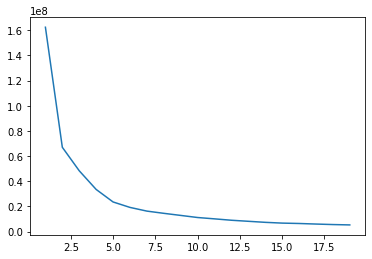

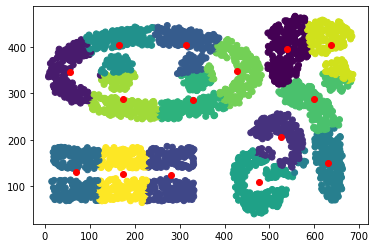

In [9]:
data = data5
df = pd.DataFrame(data[0])
X, Y = df['x'], df['y']
print(df)

X2, Y2 = [], []

j = 20

for i in range(1,j):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X2.append(i)
    Y2.append(kmeans.inertia_)
    
max_iner = Y2[0]
pourcentage = 0.05
best_cluster_number = len(Y2)

for i in range(1, len(Y2)):
    
    ecart = Y2[i - 1] - Y2[i]  
    print(f"i = {i}, Y2-1 = {Y2[i - 1]}, Y2 = {Y2[i]}")
    if (ecart < Y2[i - 1] * pourcentage):
        print(f"Le meilleur nombre de cluster est {i}")
        best_cluster_number = i
        break

plt.figure()
plt.plot(X2, Y2)

kmeans = KMeans(n_clusters = best_cluster_number, random_state=0).fit(df)
plt.figure()
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

In [ ]:
time_tab = []

time_start = time.time()
n = 20

for i in range(1,n):
    time_start = time.time()
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X1.append(i)
    Y1.append(kmeans.inertia_)
    time_end = time.time()
    time_exec = time_end - time_start
    time_tab.append(time_exec)
    
print(time_tab)
    
    
X = np.linspace(1,n - 1,n - 1)
plt.figure()
plt.plot(X, time_tab)